# Assignment week 4

#### **Author**: *Anton Pham* 13179543, *Bowen Ma* 12960780, *Weichen Fang* 13218115


## The Knapsack problem

From Linear and Integer Optimization, Gerard Sierksma & Yori Zwols, 3 𝑒𝑑 , CRC Press, 2015 (Chapter 7.2.3, page 289).

We are given a number of objects that have to be packed into a knapsack. Each object has a given value and a given size. The knapsack also has a given size, so in general we cannot pack all objects into it. We want to pack the objects in such a way that we carry with us the most valuable combination of objects, subject to the constraint that the total size of the objects does not exceed the size of the knapsack. So we need to decide which objects are to be packed in the knapsack and which ones are not. Knapsack problems can usually effectively be solved by means of the branch-and-bound algorithm.

The general form of a knapsack problem can be written as follows.
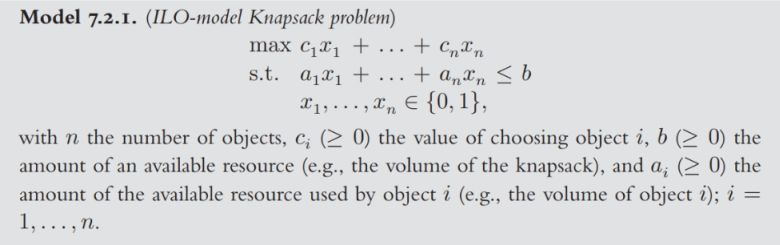

 ### MIP problem in python


In [2]:
!pip install gurobipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 55.3 MB/s eta 0:00:00


In [3]:
import gurobipy as gp
from gurobipy import *

c = [10, 13, 18, 31,  7, 15]          # Example from the Python-MIP package
a = [11, 15, 20, 35, 10, 33]
B = 47
n = len(c)                            # Number of items
I = range(n)

m = Model("Knapsack")
m.Params.LogToConsole = 0

x = m.addVars(n, name = 'Item', vtype=GRB.BINARY)
m.setObjective(sum(c[i] * x[i] for i in I), GRB.MAXIMIZE)
m.addConstr(sum(a[i] * x[i] for i in I) <= B, 'Capacity')

m.optimize()
print(f'Model has {m.NumVars} variables, {m.NumConstrs} constraints and {m.NumNZs} nonzeros\n')

# Analyse your solution
selected = [i for i in I if x[i].x >= 0.99]
print("Selected items:", [i+1 for i in I if x[i].x >= 0.99])

Value  = sum(c[i] * x[i].x for i in selected)
print("Value  of selection:", Value, '   which should be equal to:', m.ObjVal)

B_used = sum(a[i] * x[i].x for i in selected)
print("Weight of selection:", B_used,'   unused capacity: ', B - B_used)

Restricted license - for non-production use only - expires 2025-11-24
Model has 6 variables, 1 constraints and 6 nonzeros

Selected items: [1, 2, 3]
Value  of selection: 41.0    which should be equal to: 41.0
Weight of selection: 46.0    unused capacity:  1.0


### Using a function for solving a Knapsack Problem

In [4]:
import gurobipy as gp
from gurobipy import *

def BinKnapsack(c, a, B):
    """
    Model for the Binary Knapsack problem with
    """
    if len(c) < 20:
        print("Profits: ", c, "\nWeights: ", a, "\nCapacity: ", B)

    I = range(len(c))                      # Index set for items

    m = Model("Knapsack")
    m.Params.LogToConsole = 0

    x = m.addVars(len(c), name = 'Item', vtype=GRB.BINARY)
    m.setObjective(sum(c[i] * x[i] for i in I), GRB.MAXIMIZE)
    m.addConstr(sum(a[i] * x[i] for i in I) <= B, 'Capacity')

    m.update()
    print(f'Model has {m.NumVars} variables, {m.NumConstrs} constraints and {m.NumNZs} nonzeros\n')

    return m

def KnapsackSolve(c, a, B):
    n = len(c)
    I = range(n)

    m = BinKnapsack(c, a, B)
#     m.Params.timeLimit = 10.0                # max time in seconds
    m.optimize()

    status = m.Status
    if status != GRB.OPTIMAL:
        print(f"Optimization was stopped with status {status}")
    else:
        x = [var.x for var in m.getVars()]
        selected = [i for i in range(len(c)) if x[i] >= 0.99]
    return selected


def KnapsackSolution(c, a, B, sol = [-1]):
    n = len(c)                            # Number of items
    I = range(n)
    if sol == [-1]:
        sol = KnapsackSolve(c, a, B)

    s = "From n (= " + str(len(c)) + ") items the following are selected: "
    for i in sol:
        s += "{}, ".format(i+1)
    print(s[:len(s)-2] + "   (numbers in [1, n])")

    Value  = sum(c[i] for i in sol)
    print("Value  of selection:", Value)

    B_used = sum(a[i] for i in sol)
    print("Weight of selection:", B_used,'   ->  unused capacity: ', B - B_used)
    if B_used > B:
        print("!!!!!!!!!!!    infeasible selection      !!!!!!!!!!!\n")

### Problem W4.1
#### Checking the code
In the cell below, the Knapsack instance from exercise 7.2.2 is solved by calling the function KnapsackSolution(c, a, B). Alternatively, the function KnapsackSolve(c, a, B) could have been used. The latter only outputs the optimal value of the knapsack. Just check the different functions. In the next exercises they will be used again.

In [5]:
c = [5, 3, 6, 6, 2]
a = [5, 4, 7, 6, 2]
B = 15
n = len(c)
I = range(n)

KnapsackSolution(c, a, B, [0, 1 ,2])   #what is this 012 attribute?
KnapsackSolution(c, a, B)              # Finding a selection with maximal value
KnapsackSolve(c,a,B)                   #try knapsacksolve

From n (= 5) items the following are selected: 1, 2, 3   (numbers in [1, n])
Value  of selection: 14
Weight of selection: 16    ->  unused capacity:  -1
!!!!!!!!!!!    infeasible selection      !!!!!!!!!!!

Profits:  [5, 3, 6, 6, 2] 
Weights:  [5, 4, 7, 6, 2] 
Capacity:  15
Model has 5 variables, 1 constraints and 5 nonzeros

From n (= 5) items the following are selected: 1, 2, 4   (numbers in [1, n])
Value  of selection: 14
Weight of selection: 15    ->  unused capacity:  0
Profits:  [5, 3, 6, 6, 2] 
Weights:  [5, 4, 7, 6, 2] 
Capacity:  15
Model has 5 variables, 1 constraints and 5 nonzeros



[0, 1, 3]

**Conclusion:**
While the ultimate outcomes may appear distinct, they are, in fact, identical owing to inconsistent indexing. This discrepancy was addressed and rectified in question 4.4.1, where improvements were made to ensure consistency.

### Problem W4.2
#### Experimenting with different datafiles
On Canvas you can find several Excel files each with the data of a knapsack instance. The name of the files are based on the problem size (# of items) and a version number. The available files are: ks_19_0.xlsx, ks_100_0.xlsx, ks_100_1.xlsx, ks_100_2.xlsx, ks_1000_0.xlsx, and ks_10000_0.xlsx.

Solve all instances and examine the LogToConsole of the Gurobi solver. Discuss / compare the solution process for the problem instances.

In [6]:
import gurobipy as gp
from gurobipy import *

def BinKnapsack(c, a, B):
    """
    Model for the Binary Knapsack problem with
    """
    if len(c) < 20:
        print("Profits: ", c, "\nWeights: ", a, "\nCapacity: ", B)

    I = range(len(c))                      # Index set for items

    m = Model("Knapsack")
    m.Params.LogToConsole = 1  # Examine the LogToConsole of the Gurobi solver

    x = m.addVars(len(c), name = 'Item', vtype=GRB.BINARY)
    m.setObjective(sum(c[i] * x[i] for i in I), GRB.MAXIMIZE)
    m.addConstr(sum(a[i] * x[i] for i in I) <= B, 'Capacity')

    m.update()
    print(f'Model has {m.NumVars} variables, {m.NumConstrs} constraints and {m.NumNZs} nonzeros\n')

    return m

def KnapsackSolve(c, a, B):
    n = len(c)
    I = range(n)

    m = BinKnapsack(c, a, B)
#     m.Params.timeLimit = 10.0                # max time in seconds
    m.optimize()

    status = m.Status
    if status != GRB.OPTIMAL:
        print(f"Optimization was stopped with status {status}")
    else:
        x = [var.x for var in m.getVars()]
        selected = [i for i in range(len(c)) if x[i] >= 0.99]
    return selected


def KnapsackSolution(c, a, B, sol = [-1]):
    n = len(c)                            # Number of items
    I = range(n)
    if sol == [-1]:
        sol = KnapsackSolve(c, a, B)

    s = "From n (= " + str(len(c)) + ") items the following are selected: "
    for i in sol:
        s += "{}, ".format(i+1)
    print(s[:len(s)-2] + "   (numbers in [1, n])")

    Value  = sum(c[i] for i in sol)
    print("Value  of selection:", Value)

    B_used = sum(a[i] for i in sol)
    print("Weight of selection:", B_used,'   ->  unused capacity: ', B - B_used)
    if B_used > B:
        print("!!!!!!!!!!!    infeasible selection      !!!!!!!!!!!\n")

In [8]:
import pandas as pd
import time

# List of Excel files to process
files = ["ks_19_0.xlsx", "ks_100_0.xlsx", "ks_100_1.xlsx", "ks_100_2.xlsx", "ks_1000_0.xlsx"]
# Dictionary to store results
results = {}

for filename in files:
    # Load data from an Excel file
    df = pd.read_excel(filename, header=None)

    # Extract problem data from the DataFrame
    n = (df[1][0])
    B = (df[2][0])
    c = df[1].to_numpy()[1:n+1].tolist()
    a = df[2].to_numpy()[1:n+1].tolist()

    print(f"Solving instance from {filename} with {n} items and a knapsack capacity of {B}\n")

    # Measure computation time
    tic = time.perf_counter()
    # Use either KnapsackSolution or KnapsackSolve depending on what information you want to capture
    selected_items = KnapsackSolve(c, a, B)
    toc = time.perf_counter()
    print('Computation time: {:.3f} secs'.format(toc-tic))          # A few seconds later
    #print result
    results[filename] = {
        'Number of Items': n,
        'Knapsack Capacity': B,
        'Computation Time (seconds)': round(toc - tic, 3),
        'Number of Selected Items': len(selected_items)
    }

# Format and print the results in a structured way
for filename, data in results.items():
    print("\n----", filename, "----")
    for key, value in data.items():
        print(f"{key}: {value}")

Solving instance from ks_19_0.xlsx with 19 items and a knapsack capacity of 31181

Profits:  [1945, 321, 2945, 4136, 1107, 1022, 1101, 2890, 962, 1060, 805, 689, 1513, 3878, 13504, 1865, 667, 1833, 16553] 
Weights:  [4990, 1142, 7390, 10372, 3114, 2744, 3102, 7280, 2624, 3020, 2310, 2078, 3926, 9656, 32708, 4830, 2034, 4766, 40006] 
Capacity:  31181
Model has 19 variables, 1 constraints and 19 nonzeros

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: AMD EPYC 7B12, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 1 rows, 19 columns and 19 nonzeros
Model fingerprint: 0xfce7c278
Variable types: 0 continuous, 19 integer (19 binary)
Coefficient statistics:
  Matrix range     [1e+03, 4e+04]
  Objective range  [3e+02, 2e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+04, 3e+04]
Found heuristic solution: objective 11476.000000
Presolve removed 1 rows an

**Conclusion:**  
To scrutinize the LogToConsole feature of the Gurobi solver, we made modifications to the `BinKnapsack()` function by setting `m.Params.LogToConsole=1`. We observed that the computational time is impacted by both the number of items and the knapsack capacity. Analyzing datasets 100_0, 100_1, and 100_2, we deduced that when the number of items remains constant, a larger knapsack capacity tends to result in a slowdown in computation time.

### Problem W4.3
#### Use the <font color=red>Binary</font> Knapsack model to solve the <font color=red>Integer</font> Knapsack problem

In this exercise we look at the three versions of the Knapsack (KS) problem: the continuous KS problem, the integer KS problem and the binary KS problem. Clearly, the implementation of the models is the same, except for the variable type that is assumed for the model.

In the cell below, the model for the integer KS problem is given. For the continuous versions no seperate model is needed as we can simply create a relaxed model by <code>r = m.relax()</code> and solve this continuous version. For the problem instance from exercise 7.5.31 the optimal integer and continuous solution are determined. The latter could of course been determined by hand using the ratio method. Here the gap between the LP-relaxation and the optimal integer solution is 6.

- The LP-relaxation can easily be improved by adding some problem instance specific constraints. Add the most obvious ones and see how it improves the relaxation (i.e. providing a tighter upper bound / smaller gap).
- For answering exercise 7.5.31, you need to transform the given integer KS problem instance into a binary KS problem instance. Or in other words, determine the required number of items with their weights and values and use KnapsackSolution(c, a, B) to solve it.

In [9]:
import gurobipy as gp
from gurobipy import *

c = [10, 24, 10,  2]
a = [ 2,  4,  3,  1]
B = 23
n = len(c)                  # Number of items
I = range(n)

m = Model("Integer Knapsack")
m.Params.LogToConsole = 0

x = m.addVars(n, name = 'Item', vtype=GRB.INTEGER)
m.setObjective(sum(c[i] * x[i] for i in I), GRB.MAXIMIZE)
m.addConstr(sum(a[i] * x[i] for i in I) <= B, 'Capacity')

m.optimize()
print(f'Model has {m.NumVars} variables, {m.NumConstrs} constraints and {m.NumNZs} nonzeros\n')
print("Solved as INTEGER Knapsack problem:")
m.optimize()
for v in m.getVars():
    print('{0:10} = {1:6.2f}'.format(v.VarName, v.x))
print("Optimal value objective: z = ", m.ObjVal)
B_used = sum(a[i] * x[i].x for i in selected)
print("Weight of selection:", B_used,'   unused capacity: ', B - B_used)


r = m.relax()
r.optimize()
print("\nSolved as CONTINUOUS Knapsack problem:")
for v in r.getVars():
    print('{0:10} = {1:6.2f}'.format(v.VarName, v.x))
print("Optimal value objective: z = ", r.ObjVal)
B_used = sum(a[i] * x[i].x for i in selected)
print("Weight of selection:", B_used,'   unused capacity: ', B - B_used)

# Q1
c = [10, 24, 10,  2]
a = [ 2,  4,  3,  1]
B = 23
n = len(c)                  # Number of items
I = range(n)

m = Model("Integer Knapsack")
m.Params.LogToConsole = 0

x = m.addVars(n, name = 'Item', vtype=GRB.INTEGER)
m.setObjective(sum(c[i] * x[i] for i in I), GRB.MAXIMIZE)
m.addConstr(sum(a[i] * x[i] for i in I) <= B, 'Capacity')
for i in I:
    m.addConstr(x[i] <= B // a[i])  # Add cutting planes to improve the LP-relaxation
m.optimize()
r = m.relax()
r.optimize()
print("\nSolved an improved CONTINUOUS Knapsack problem:")
for v in r.getVars():
    print('{0:10} = {1:6.2f}'.format(v.VarName, v.x))
print("Optimal value objective: z = ", r.ObjVal)
B_used = sum(a[i] * x[i].x for i in selected)
print("Weight of selection:", B_used,'   unused capacity: ', B - B_used)

# Q2

print("\nSolved as BINARY Knapsack problem:")
KnapsackSolution(c,a,B)


Model has 4 variables, 1 constraints and 4 nonzeros

Solved as INTEGER Knapsack problem:
Item[0]    =   1.00
Item[1]    =   5.00
Item[2]    =  -0.00
Item[3]    =   1.00
Optimal value objective: z =  132.0
Weight of selection: 22.0    unused capacity:  1.0

Solved as CONTINUOUS Knapsack problem:
Item[0]    =  -0.00
Item[1]    =   5.75
Item[2]    =  -0.00
Item[3]    =  -0.00
Optimal value objective: z =  138.0
Weight of selection: 22.0    unused capacity:  1.0

Solved an improved CONTINUOUS Knapsack problem:
Item[0]    =   1.50
Item[1]    =   5.00
Item[2]    =  -0.00
Item[3]    =  -0.00
Optimal value objective: z =  135.0
Weight of selection: 22.0    unused capacity:  1.0

Solved as BINARY Knapsack problem:
Profits:  [10, 24, 10, 2] 
Weights:  [2, 4, 3, 1] 
Capacity:  23
Model has 4 variables, 1 constraints and 4 nonzeros

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: AMD EPYC 7B12, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical c

**Conclusion:**
We added constraint that $0\leq x_t\leq\frac{B}{a_t}$, for the improved continuous Knapsack Problem, which shows the largest number of item $t$ that we can put in to the knapsack when it is empty. After adding the constraint we found that $x*=\{1.5,5,0,0\}$ and $z^*=135$.  
In the Binary Knapsack Problem, the application of the KnapsackSolution function has revealed an optimal solution where all items are selected, resulting in an objective function value of $z^*=46$. Notably, this optimal solution leaves 13 units of unused capacity.

### Problem W4.4
#### Use cuts to improve the LP-relaxation of the <font color=red>Binary</font> Knapsack problem
We will look at the 19-items instance again. In exercise 4.2 you have already found an optimal solution. In this exercise we look at the LP-relaxation and we will add some valid inequalities for this problem instance.
- 4.4.1
- In the cell below, the code for reading the data is already given. Copy/paste the code for the binary knapsack model and solve the relaxed version.
- 4.4.2
- Inspect and compare the solution with the optimal solution and find some obvious valid inequalities for this problem instance. Don't forget to look at the data itself. Add these constraints and solve the LP-relaxation again. Has the solution improved (smaller gap)? How did the solution change?
- Try to find a few valid inequalities more. Are you able to close the gap?

In [10]:
!pip install mip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 441.8/441.8 kB 46.7 MB/s eta 0:00:00
  Attempting uninstall: cffi
    Found existing installation: cffi 1.16.0
    Uninstalling cffi-1.16.0:
      Successfully uninstalled cffi-1.16.0


### 4.4.1

In [11]:
import gurobipy as gp
from gurobipy import *

def relaxed_BinKnapsack(c, a, B):
    """
    Model for the Binary Knapsack problem with
    """
    if len(c) < 20:
        print("Profits: ", c, "\nWeights: ", a, "\nCapacity: ", B)

    I = range(len(c))                      # Index set for items

    m = Model("Knapsack")
    m.Params.LogToConsole = 0

    x = m.addVars(len(c), name = 'Item', lb=0,ub=1) # Relaxed model
    m.setObjective(sum(c[i] * x[i]for i in I), GRB.MAXIMIZE)
    m.addConstr(sum(a[i] * x[i] for i in I) <= B, 'Capacity')

    m.update()
    print(f'Model has {m.NumVars} variables, {m.NumConstrs} constraints and {m.NumNZs} nonzeros\n')

    return m

def relaxed_KnapsackSolve(c, a, B):
    n = len(c)
    I = range(n)

    m = relaxed_BinKnapsack(c, a, B)
    m.optimize()

    status = m.Status
    if status != GRB.OPTIMAL:
        print(f"Optimization was stopped with status {status}")
    else:
        x = [var.x for var in m.getVars()]
        selected = [i for i in range(len(c)) if x[i] >0]
        selected=[x+1 for x in selected]
        profit=sum(x*c)
    print(x)
    print (f"We select item {selected}")
    print(f"The profit of the relaxed binary knapsack problem is {profit}")

In [12]:
import pandas as pd
#from mip import *
import gurobipy as gp
from gurobipy import *

df = pd.read_excel("ks_19_0.xlsx", header = None)
n = df[1][0]
B = df[2][0]
c = df[1].to_numpy()[1:n+1]
a = df[2].to_numpy()[1:n+1]

relaxed_KnapsackSolve(c, a, B)

Profits:  [ 1945   321  2945  4136  1107  1022  1101  2890   962  1060   805   689
  1513  3878 13504  1865   667  1833 16553] 
Weights:  [ 4990  1142  7390 10372  3114  2744  3102  7280  2624  3020  2310  2078
  3926  9656 32708  4830  2034  4766 40006] 
Capacity:  31181
Model has 19 variables, 1 constraints and 19 nonzeros

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.779408088786682]
We select item [19]
The profit of the relaxed binary knapsack problem is 12901.542093685946


In [ ]:
## Model without relaxation
df = pd.read_excel("ks_19_0.xlsx", header = None)
n = df[1][0]
B = df[2][0]
c = df[1].to_numpy()[1:n+1]
a = df[2].to_numpy()[1:n+1]

KnapsackSolution(c, a, B)

Profits:  [ 1945   321  2945  4136  1107  1022  1101  2890   962  1060   805   689
  1513  3878 13504  1865   667  1833 16553] 
Weights:  [ 4990  1142  7390 10372  3114  2744  3102  7280  2624  3020  2310  2078
  3926  9656 32708  4830  2034  4766 40006] 
Capacity:  31181
Model has 19 variables, 1 constraints and 19 nonzeros

From n (= 19) items the following are selected: 3, 6, 8, 13, 14   (numbers in [1, n])
Value  of selection: 12248
Weight of selection: 30996    ->  unused capacity:  185


**Conclusion:** By relaxing the constraint from $x_i\in\{0,1\}$ to $\leq0 \leq x_i \leq 1$, notable changes were observed in the optimization process. The adjusted constraint allowed for fractional values of the decision variable. The optimal solution revealed that, to maximize the value of items placed in the knapsack, it is most beneficial to select only item 19. However, as the weight of item 19 exceeds the knapsack's capacity, we opted to include only 0.779408088786682 of item 19—this fractional inclusion being possible due to the relaxation of constraints.

Remarkably, the optimal value obtained through this relaxed constraint is 12901.542093685946, surpassing the value of 12248 achieved without the relaxation. This underscores the impact of constraint adjustments on the optimization outcome.  
Indeed, the obtained result aligns with the logical inference, considering the ratios of $\frac{c_i}{a_i}$ (value per unit). Notably, item 19 exhibits the highest ratio among all items, approximately $\frac{c_{19}}{a_{19}} \approx 0.4138$, surpassing the ratios of all other items which are smaller than 0.4

### 4.4.2 Add more constraints and solve the LP-relaxation
Recognizing that fractional allocations of goods may not be practical in real-life scenarios, additional constraints have been introduced to enhance the model's realism. These new constraints aim to refine the optimization problem by aligning the decision variables more closely with real-world constraints and limitations.

In [13]:
## Model with extra constraints but without relaxation
import gurobipy as gp
from gurobipy import *
def extraconstraints_BinKnapsack(c, a, B):
    """
    Model for the Binary Knapsack problem with
    """
    if len(c) < 20:
        print("Profits: ", c, "\nWeights: ", a, "\nCapacity: ", B)

    I = range(len(c))                      # Index set for items

    m = Model("Knapsack")
    m.Params.LogToConsole = 0

    x = m.addVars(len(c), name = 'Item',vtype=GRB.BINARY) # Not Relaxed model
    for i in I:
        if a[i] > B:
            x[i] = 0  # Set items exceeding capacity equal to 0
    m.setObjective(sum(c[i] * x[i]for i in I), GRB.MAXIMIZE)
    m.addConstr(sum(a[i] * x[i] for i in I) <= B, 'Capacity')

    m.update()
    print(f'Model has {m.NumVars} variables, {m.NumConstrs} constraints and {m.NumNZs} nonzeros\n')

    return m

def extraconstraints_KnapsackSolve(c, a, B):
    n = len(c)
    I = range(n)

    m = extraconstraints_BinKnapsack(c, a, B)
    m.optimize()

    status = m.Status
    if status != GRB.OPTIMAL:
        print(f"Optimization was stopped with status {status}")
    else:
        x = [var.x for var in m.getVars()]
        selected = [i for i in range(len(c)) if x[i] >0]
        selected=[x+1 for x in selected]
        profit=sum(x*c)
    print(x)
    print (f"We select item {selected}")
    print(f"The profit of the binary knapsack problem with extra constraints is {profit}")

In [ ]:
import pandas as pd
#from mip import *
import gurobipy as gp
from gurobipy import *

df = pd.read_excel("ks_19_0.xlsx", header = None)
n = df[1][0]
B = df[2][0]
c = df[1].to_numpy()[1:n+1]
a = df[2].to_numpy()[1:n+1]

extraconstraints_KnapsackSolve(c, a, B)

Profits:  [ 1945   321  2945  4136  1107  1022  1101  2890   962  1060   805   689
  1513  3878 13504  1865   667  1833 16553] 
Weights:  [ 4990  1142  7390 10372  3114  2744  3102  7280  2624  3020  2310  2078
  3926  9656 32708  4830  2034  4766 40006] 
Capacity:  31181
Model has 19 variables, 1 constraints and 17 nonzeros

[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
We select item [3, 6, 8, 13, 14]
The profit of the binary knapsack problem with extra constraints is 12248.0


In [14]:
## Model with extra constraints and relaxation
import gurobipy as gp
from gurobipy import *
def extraconstraints_relaxed_BinKnapsack(c, a, B):
    """
    Model for the Binary Knapsack problem with
    """
    if len(c) < 20:
        print("Profits: ", c, "\nWeights: ", a, "\nCapacity: ", B)

    I = range(len(c))                      # Index set for items

    m = Model("Knapsack")
    m.Params.LogToConsole = 0

    x = m.addVars(len(c), name = 'Item',lb=0,ub=1) # Relaxed model
    for i in I:
        if a[i] > B:
            x[i] = 0 # Set items exceeding capacity equal to 0
    m.setObjective(sum(c[i] * x[i]for i in I), GRB.MAXIMIZE)
    m.addConstr(sum(a[i] * x[i] for i in I) <= B, 'Capacity')

    m.update()
    print(f'Model has {m.NumVars} variables, {m.NumConstrs} constraints and {m.NumNZs} nonzeros\n')

    return m

def extraconstraints_relaxed_KnapsackSolve(c, a, B):
    n = len(c)
    I = range(n)

    m = extraconstraints_relaxed_BinKnapsack(c, a, B)
    m.optimize()

    status = m.Status
    if status != GRB.OPTIMAL:
        print(f"Optimization was stopped with status {status}")
    else:
        x = [var.x for var in m.getVars()]
        selected = [i for i in range(len(c)) if x[i] >0]
        selected=[x+1 for x in selected]
        profit=sum(x*c)
    print(x)
    print (f"We select item {selected}")
    print(f"The profit of the binary knapsack problem with extra constraints and relaxation is {profit}")

In [15]:
import pandas as pd
#from mip import *
import gurobipy as gp
from gurobipy import *

df = pd.read_excel("ks_19_0.xlsx", header = None)
n = df[1][0]
B = df[2][0]
c = df[1].to_numpy()[1:n+1]
a = df[2].to_numpy()[1:n+1]

extraconstraints_relaxed_KnapsackSolve(c, a, B)

Profits:  [ 1945   321  2945  4136  1107  1022  1101  2890   962  1060   805   689
  1513  3878 13504  1865   667  1833 16553] 
Weights:  [ 4990  1142  7390 10372  3114  2744  3102  7280  2624  3020  2310  2078
  3926  9656 32708  4830  2034  4766 40006] 
Capacity:  31181
Model has 19 variables, 1 constraints and 17 nonzeros

[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.5168956043956044, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
We select item [3, 4, 8, 14]
The profit of the binary knapsack problem with extra constraints and relaxation is 12452.828296703297


**Conclusion:** In the dataset analysis, it was observed that items 15 and 19 exceeded the knapsack capacity. Consequently, these items were excluded by imposing additional constraints. The optimal solution, under these refined conditions, involves selecting items 3, 6, 8, 13, and 14. The corresponding optimal objective value is determined to be 12,248. This outcome aligns with the scenario characterized by binary constraints alone, without the presence of additional constraints.

Upon relaxing the existing model, the optimal selection comprises items 3, 4, 8, and 14. Notably, a fractional portion of item 8 is included in the optimal solution, resulting in an approximate objective value of 12,452.83. This falls within the range of objective values observed in scenarios without additional constraints and relaxed models, yet constrained and non-relaxed models. The model is improved.



### Problem W4.5
#### Use Dynamic Programming to solve <font color=red>Binary and Integer</font> Knapsack problem
First, we will look at the 19-items instance again. In Problem 4.2 you have already found an optimal solution.
- In the cell below, the code for reading the data is already given. Use the resursive formulation of the DP-model for the Binary Knapsack Problem. Write a few lines of code to fill the DP-table with 19 rows (for the items) and B+1 columns (for the capacity of the knapsack).

Next, we will look at the 4-items instance of W4.3 again.

- Use the resursive formulation of the DP-model for the integer Knapsack Problem. Write a few lines of code to fill a DP-table with only 1 row (for G(w), see tutorial 6) and B+1 columns (for the capacity of the knapsack).
- Solve the problem also for larger values for B. Can you detect a pattern for the optimal solution?

In [16]:
import pandas as pd
# from mip import *

df = pd.read_excel("ks_19_0.xlsx", header = None)
n = df[1][0]
B = df[2][0]
c = df[1].to_numpy()[1:n+1]
a = df[2].to_numpy()[1:n+1]
weight_big = B
items_big = list(zip(c, a))





c = [10, 24, 10,  2]
a = [ 2,  4,  3,  1]
B = 23
weight = B
items = list(zip(c, a))



In [ ]:
def solve_knapsack_DP(items, weight, memo={}):
    """Function to solve knapsack problem using dynamic programming:
    - Left branch: cases when the next item is included
    - Right branch: cases when the next item is excluded

    Args:
        items (tuple): sequence of items, each represented by its value and weight
        weight (int or float): the maximum weight that the knapsack can carry
        memo (dict, optional): memorization of the calculated weights. Defaults to {}.
    """

    if (len(items), weight) in memo:
        result = memo[(len(items), weight)]

    elif not items or weight == 0:
        result = (0, ())

    elif items[-1][1] > weight:
        # Explore the right branch only
        result = solve_knapsack_DP(items[:-1], weight, memo)

    else:
        item_next = items.pop()
        # Explore the left branch
        with_val, with_items = solve_knapsack_DP(items, weight - item_next[1], memo)
        with_val += item_next[0]
        # Explore the right branch
        without_val, without_items = solve_knapsack_DP(items, weight, memo)
        # Choose the branch that maximizes the value
        if with_val > without_val:
            result = (with_val, with_items + (item_next,))
        else:
            result = (without_val, without_items)

    memo[(len(items), weight)] = result

    return result


solve_knapsack_DP(items, weight)

(46, ((10, 2), (24, 4), (10, 3), (2, 1)))

In [17]:
solve_knapsack_DP(items_big, weight_big)

(12049, ((4136, 10372), (689, 2078), (1513, 3926), (3878, 9656), (1833, 4766)))

**Conclusion:** For the optimal solution, we can note that there is a fundamental sub-problem to be solved - cases that have the same set of remaining items to consider given the remaining available weight. The available weight depends on the total weight of the items that have been taken so far, but not upon which items are taken or the total amount of items taken. Therefore, we can solve these subproblems recursively and call their results everytime we need to use them.